# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | holualoa
Processing Record 3 of Set 1 | lautoka
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | luziania
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | thunder bay
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | guarapari
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | humaita
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | sinabang
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | sicuani
Processing Record 22 of Set 1 | longyearbyen
Proc

Processing Record 40 of Set 4 | sisimiut
Processing Record 41 of Set 4 | copiapo
Processing Record 42 of Set 4 | atafu village
Processing Record 43 of Set 4 | dakhla
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | shenjiamen
Processing Record 47 of Set 4 | kasongo-lunda
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | edgewater
Processing Record 0 of Set 5 | dudinka
Processing Record 1 of Set 5 | benedita
Processing Record 2 of Set 5 | jayapura
Processing Record 3 of Set 5 | caldes de montbui
Processing Record 4 of Set 5 | shimanovsk
Processing Record 5 of Set 5 | alo
Processing Record 6 of Set 5 | wynyard
Processing Record 7 of Set 5 | aasiaat
Processing Record 8 of Set 5 | wewak
Processing Record 9 of Set 5 | chifeng
Processing Record 10 of Set 5 | yermakovskoye
Processing Record 11 of Set 5 | susuman
Processing Record 12 of Set 5 | kushiro
Processing Record 13 of Set 5 | al mindak
Processing Reco

Processing Record 33 of Set 8 | yarmouth
Processing Record 34 of Set 8 | glace bay
Processing Record 35 of Set 8 | vila velha
Processing Record 36 of Set 8 | bodo
Processing Record 37 of Set 8 | new norfolk
Processing Record 38 of Set 8 | riberalta
Processing Record 39 of Set 8 | tromso
Processing Record 40 of Set 8 | topeka
Processing Record 41 of Set 8 | vikhorevka
Processing Record 42 of Set 8 | novyy urengoy
Processing Record 43 of Set 8 | ore
Processing Record 44 of Set 8 | phan thiet
Processing Record 45 of Set 8 | mukalla
Processing Record 46 of Set 8 | berberati
Processing Record 47 of Set 8 | manatutu
City not found. Skipping...
Processing Record 48 of Set 8 | mount gambier
Processing Record 49 of Set 8 | anloga
Processing Record 0 of Set 9 | hithadhoo
Processing Record 1 of Set 9 | waterloo
Processing Record 2 of Set 9 | sal rei
Processing Record 3 of Set 9 | usinsk
Processing Record 4 of Set 9 | mar del plata
Processing Record 5 of Set 9 | beboto
Processing Record 6 of Set 9

Processing Record 24 of Set 12 | grande prairie
Processing Record 25 of Set 12 | alausi
Processing Record 26 of Set 12 | laguna
Processing Record 27 of Set 12 | morant bay
Processing Record 28 of Set 12 | azul
Processing Record 29 of Set 12 | ilorin
Processing Record 30 of Set 12 | oamaru
Processing Record 31 of Set 12 | ginir
Processing Record 32 of Set 12 | el nido
Processing Record 33 of Set 12 | geraldton
Processing Record 34 of Set 12 | nizhniy kuranakh
Processing Record 35 of Set 12 | at taj
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | qaryat suluq
Processing Record 38 of Set 12 | qarqaraly
Processing Record 39 of Set 12 | bathsheba
Processing Record 40 of Set 12 | kasempa
Processing Record 41 of Set 12 | hasaki
Processing Record 42 of Set 12 | prado
Processing Record 43 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 44 of Set 12 | milford haven
Processing Record 45 of Set 12 | socorro
Processing Record 46 of Set 12 | mili
Processi

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,15.93,95,75,1.54,US,1691595301
1,holualoa,19.6228,-155.9522,23.91,78,100,5.14,US,1691595156
2,lautoka,-17.6167,177.4667,21.92,83,75,5.14,FJ,1691595349
3,port mathurin,-19.6833,63.4167,22.96,64,45,9.02,MU,1691595349
4,margaret river,-33.9500,115.0667,11.16,71,86,1.60,AU,1691595350


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,15.93,95,75,1.54,US,1691595301
1,holualoa,19.6228,-155.9522,23.91,78,100,5.14,US,1691595156
2,lautoka,-17.6167,177.4667,21.92,83,75,5.14,FJ,1691595349
3,port mathurin,-19.6833,63.4167,22.96,64,45,9.02,MU,1691595349
4,margaret river,-33.9500,115.0667,11.16,71,86,1.60,AU,1691595350


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

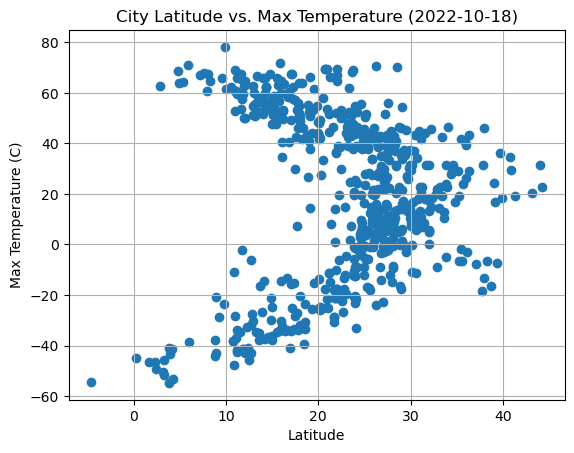

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

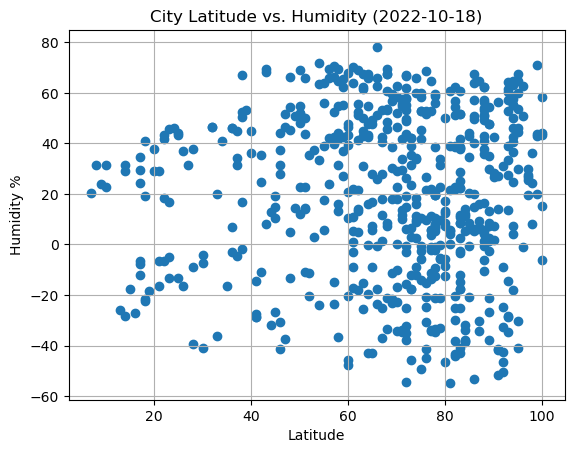

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

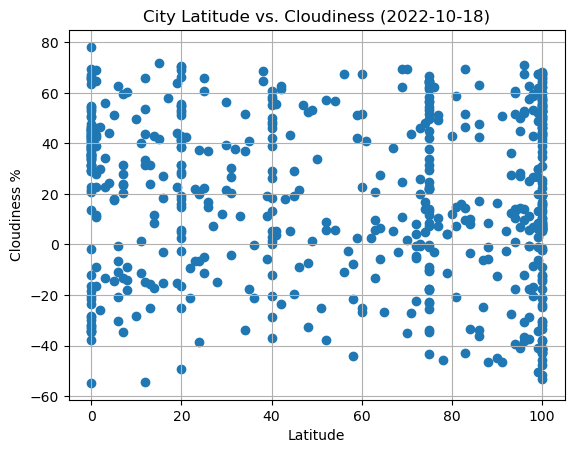

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

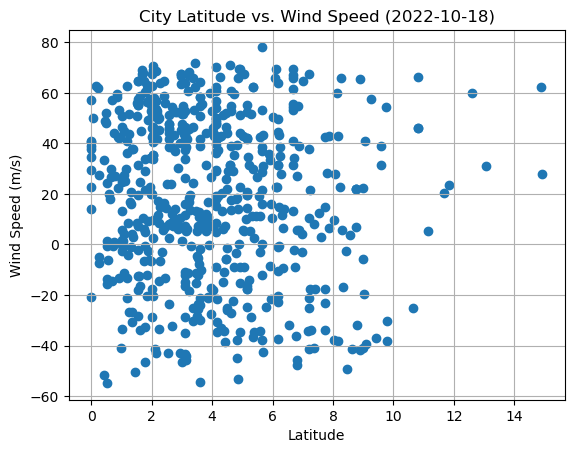

In [18]:
plt.scatter(city_data_df['Wind Speed'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid() 

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
# def lregress(x, y, lincoord):    
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#     regress = x * slope + intercept
#     #line provided by ask BCS as my version was assumed to cause an error by ctwitchell
#     liney = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     print(f"The r-value is: {rvalue**2}")
#     plt.annotate(liney, lincoord, color = 'red')
#     plt.plot(x, regress)
#     plt.scatter(x, y)
#     plt.show()
    
def lregress(x, y, lincoord):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress)
    plt.annotate(line, lincoord, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,15.93,95,75,1.54,US,1691595301
1,holualoa,19.6228,-155.9522,23.91,78,100,5.14,US,1691595156
7,thunder bay,48.4001,-89.3168,19.99,68,40,4.12,CA,1691595140
10,olonkinbyen,70.9221,-8.7187,5.86,99,96,4.60,SJ,1691595082
13,yellowknife,62.4560,-114.3525,17.29,63,100,5.36,CA,1691595079


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lautoka,-17.6167,177.4667,21.92,83,75,5.14,FJ,1691595349
3,port mathurin,-19.6833,63.4167,22.96,64,45,9.02,MU,1691595349
4,margaret river,-33.9500,115.0667,11.16,71,86,1.60,AU,1691595350
5,luziania,-16.2525,-47.9503,28.88,26,0,5.14,BR,1691595350
6,grytviken,-54.2811,-36.5092,-4.63,72,12,3.61,GS,1691595350


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4187571215675784


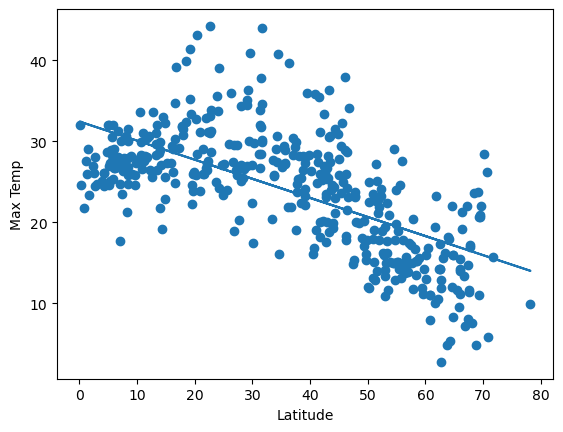

In [32]:
# Linear regression on Northern Hemisphere
lregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (6, -10))


In [ ]:
# Linear regression on Southern Hemisphere
linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-55, 35))

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


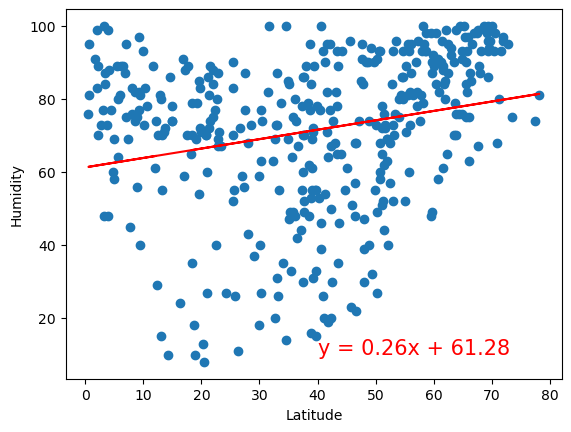

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


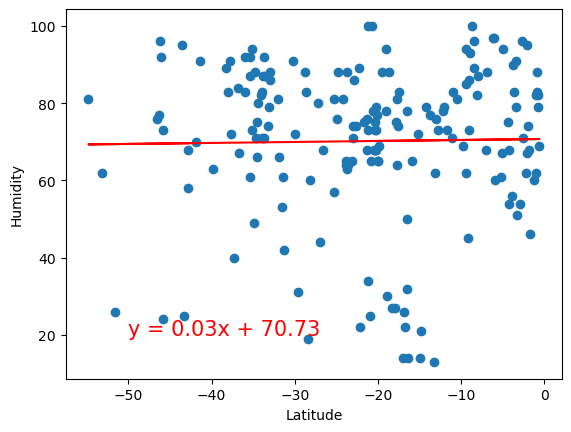

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


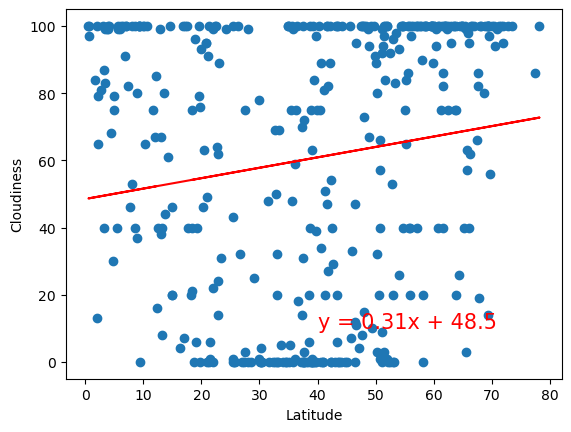

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


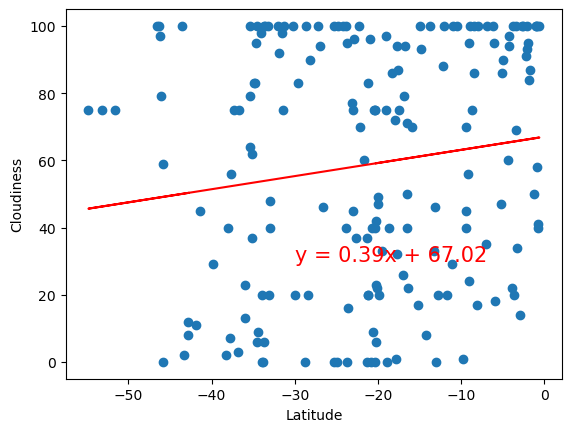

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


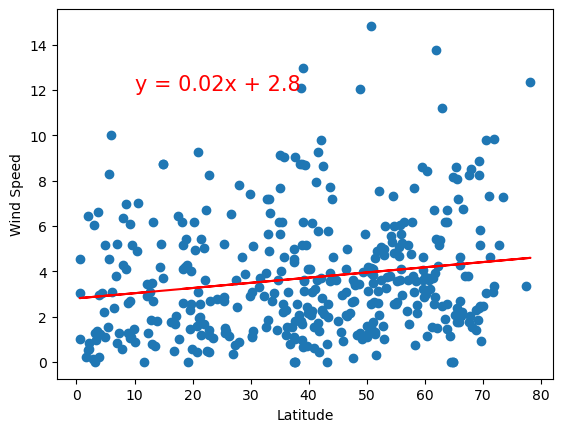

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


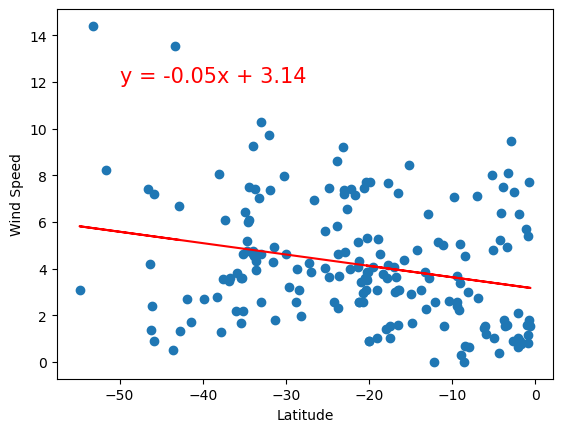

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE